In [1]:
#setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Set plot style
sns.set_style('whitegrid')

In [2]:
# Download the dataset using the Kaggle Hub API
print("Downloading dataset...")
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

# Load the dataset from the downloaded path
file_path = f'{path}/heart_disease_uci.csv'
df = pd.read_csv(file_path)

print("Dataset downloaded and loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Using Colab cache for faster access to the 'heart-disease-data' dataset.
Dataset downloaded and loaded successfully.
Data shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
print("Give Dataset info")
df.info()

print("Give Dataset description")
df.describe()

Give Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
Give Dataset description


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [4]:
#first deal with null values
print("Missing values")
df.isnull().sum().sort_values(ascending=False)

Missing values


,0
ca,611
thal,486
slope,309
fbs,90
oldpeak,62
trestbps,59
exang,55
thalch,55
chol,30
restecg,2


In [5]:
df.dataset.value_counts()

,count
dataset,
Cleveland,304
Hungary,293
VA Long Beach,200
Switzerland,123


In [6]:
df.drop('id',axis=1,inplace=True)

In [7]:
num_columns=df.select_dtypes(exclude='object').columns
cat_columns=df.select_dtypes(include='object').columns

In [8]:
print(num_columns)

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')


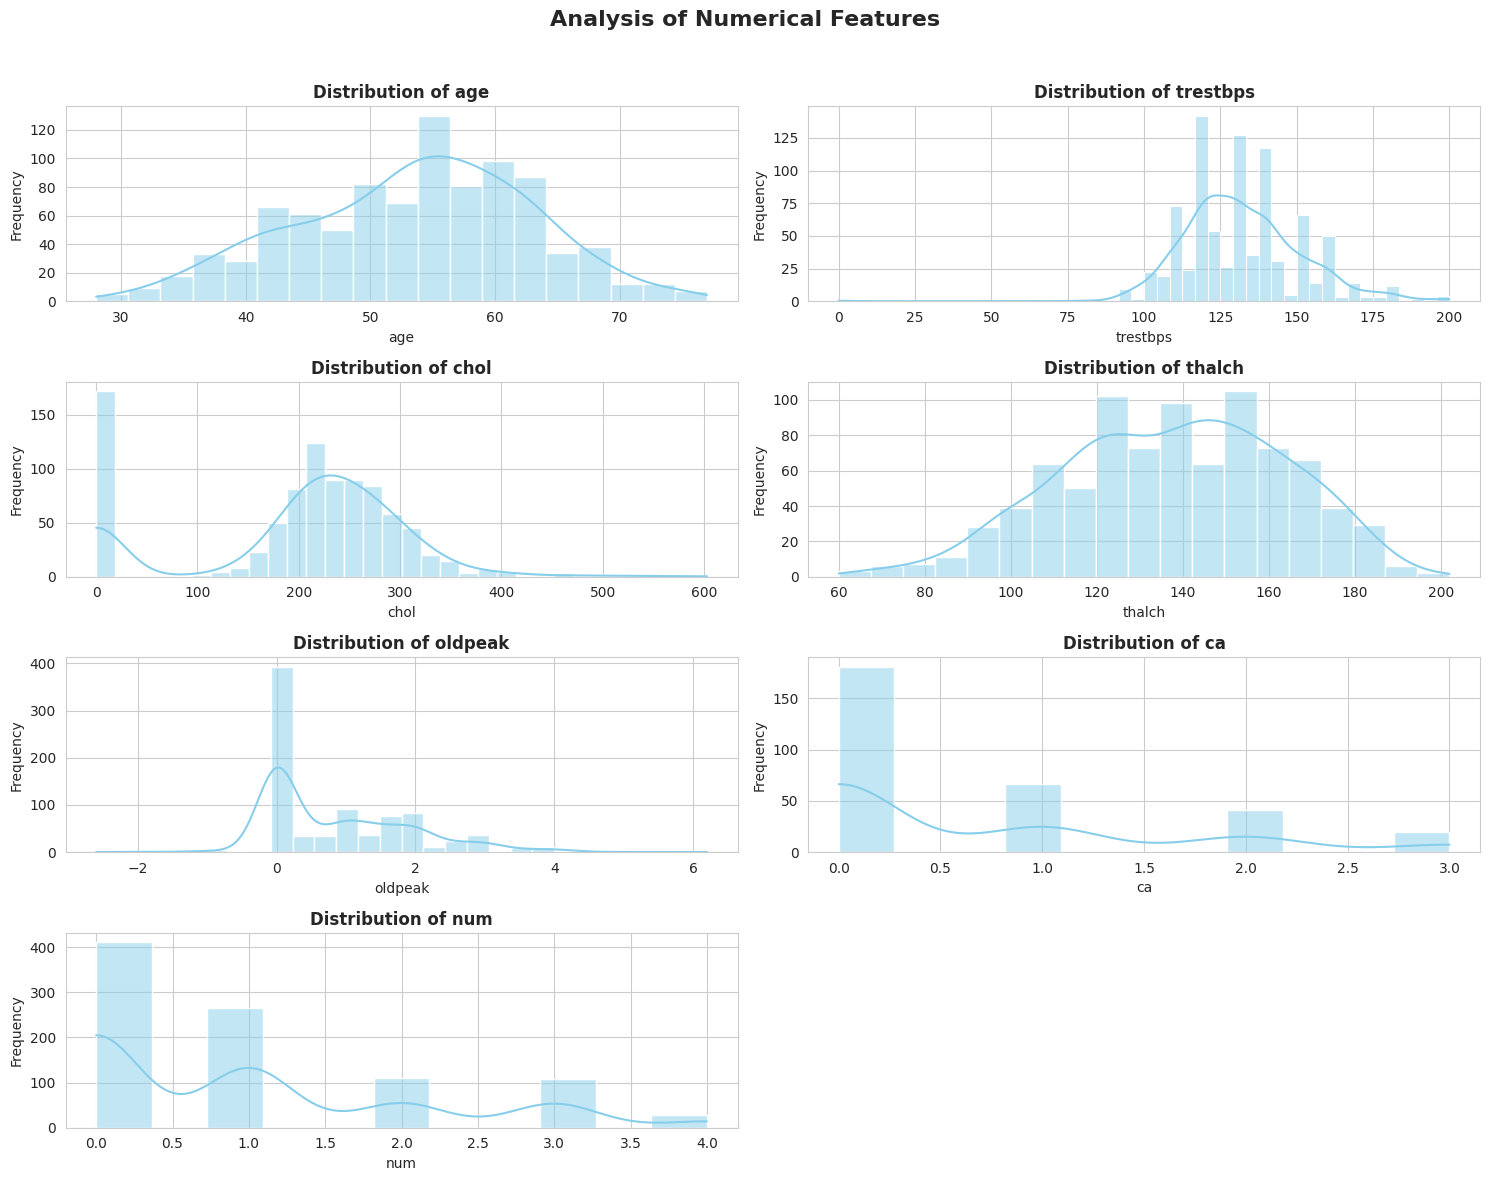

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Number of plots needed
n = len(num_columns)
rows = math.ceil(n / 2)  # 2 columns layout

fig, axes = plt.subplots(rows, 2, figsize=(15, rows * 3))
plt.suptitle("Analysis of Numerical Features", fontsize=16, fontweight="bold")

# Flatten axes for easy indexing
axes = axes.flatten()

for i, col in enumerate(num_columns):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True, color="skyblue")
    axes[i].set_title(f"Distribution of {col}", fontsize=12, fontweight="bold")
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=10)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for suptitle
plt.show()


**Insights**

Most people are around the age of 40 -70 in dataset.

There are large number of people who had resting blood pressure greather than 120 which shows concerns related with heart disease.



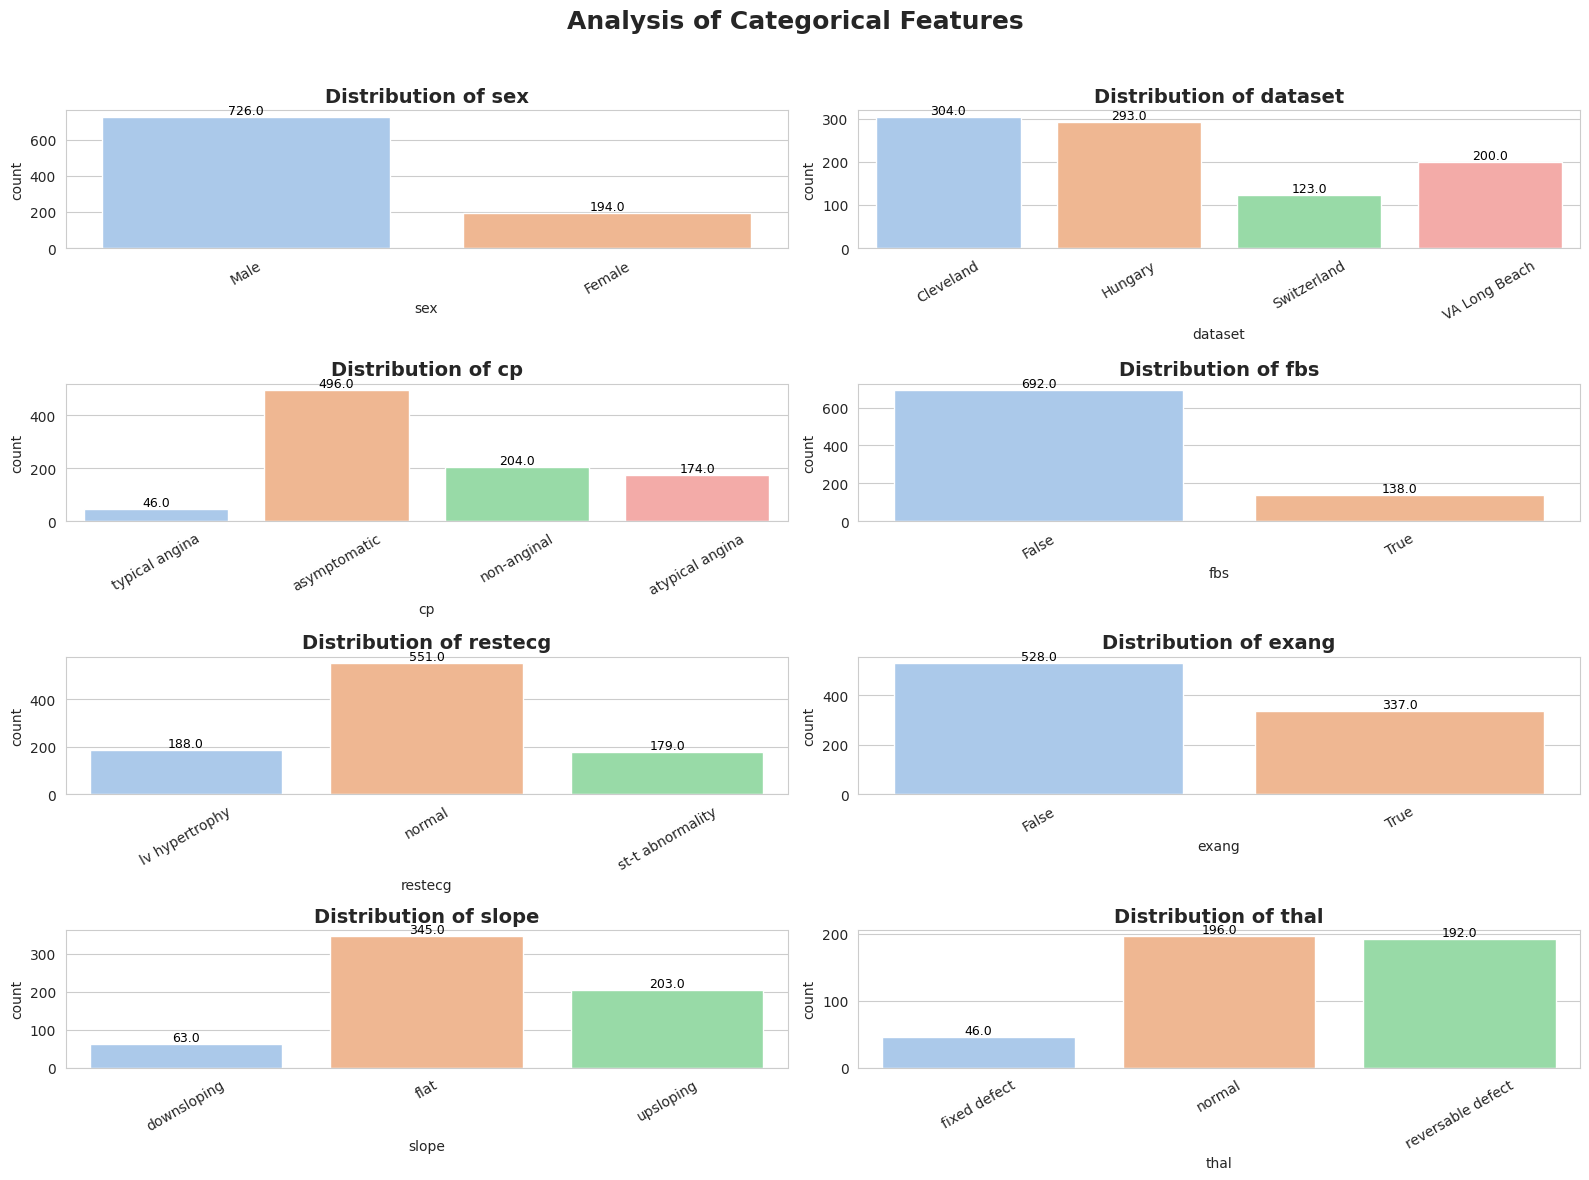

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
plt.suptitle("Analysis of Categorical Features", fontsize=18, fontweight="bold")

axes = axes.flatten()

for i, col in enumerate(cat_columns):
    ax = axes[i]

    # Plot with categorical palette automatically sized to categories
    sns.countplot(data=df, x=col, hue=col, ax=ax, palette="pastel", legend=False)

    # Title
    ax.set_title(f"Distribution of {col}", fontsize=14, fontweight="bold")

    # Rotate x labels safely
    ax.tick_params(axis='x', rotation=30)

    # Add value labels on bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


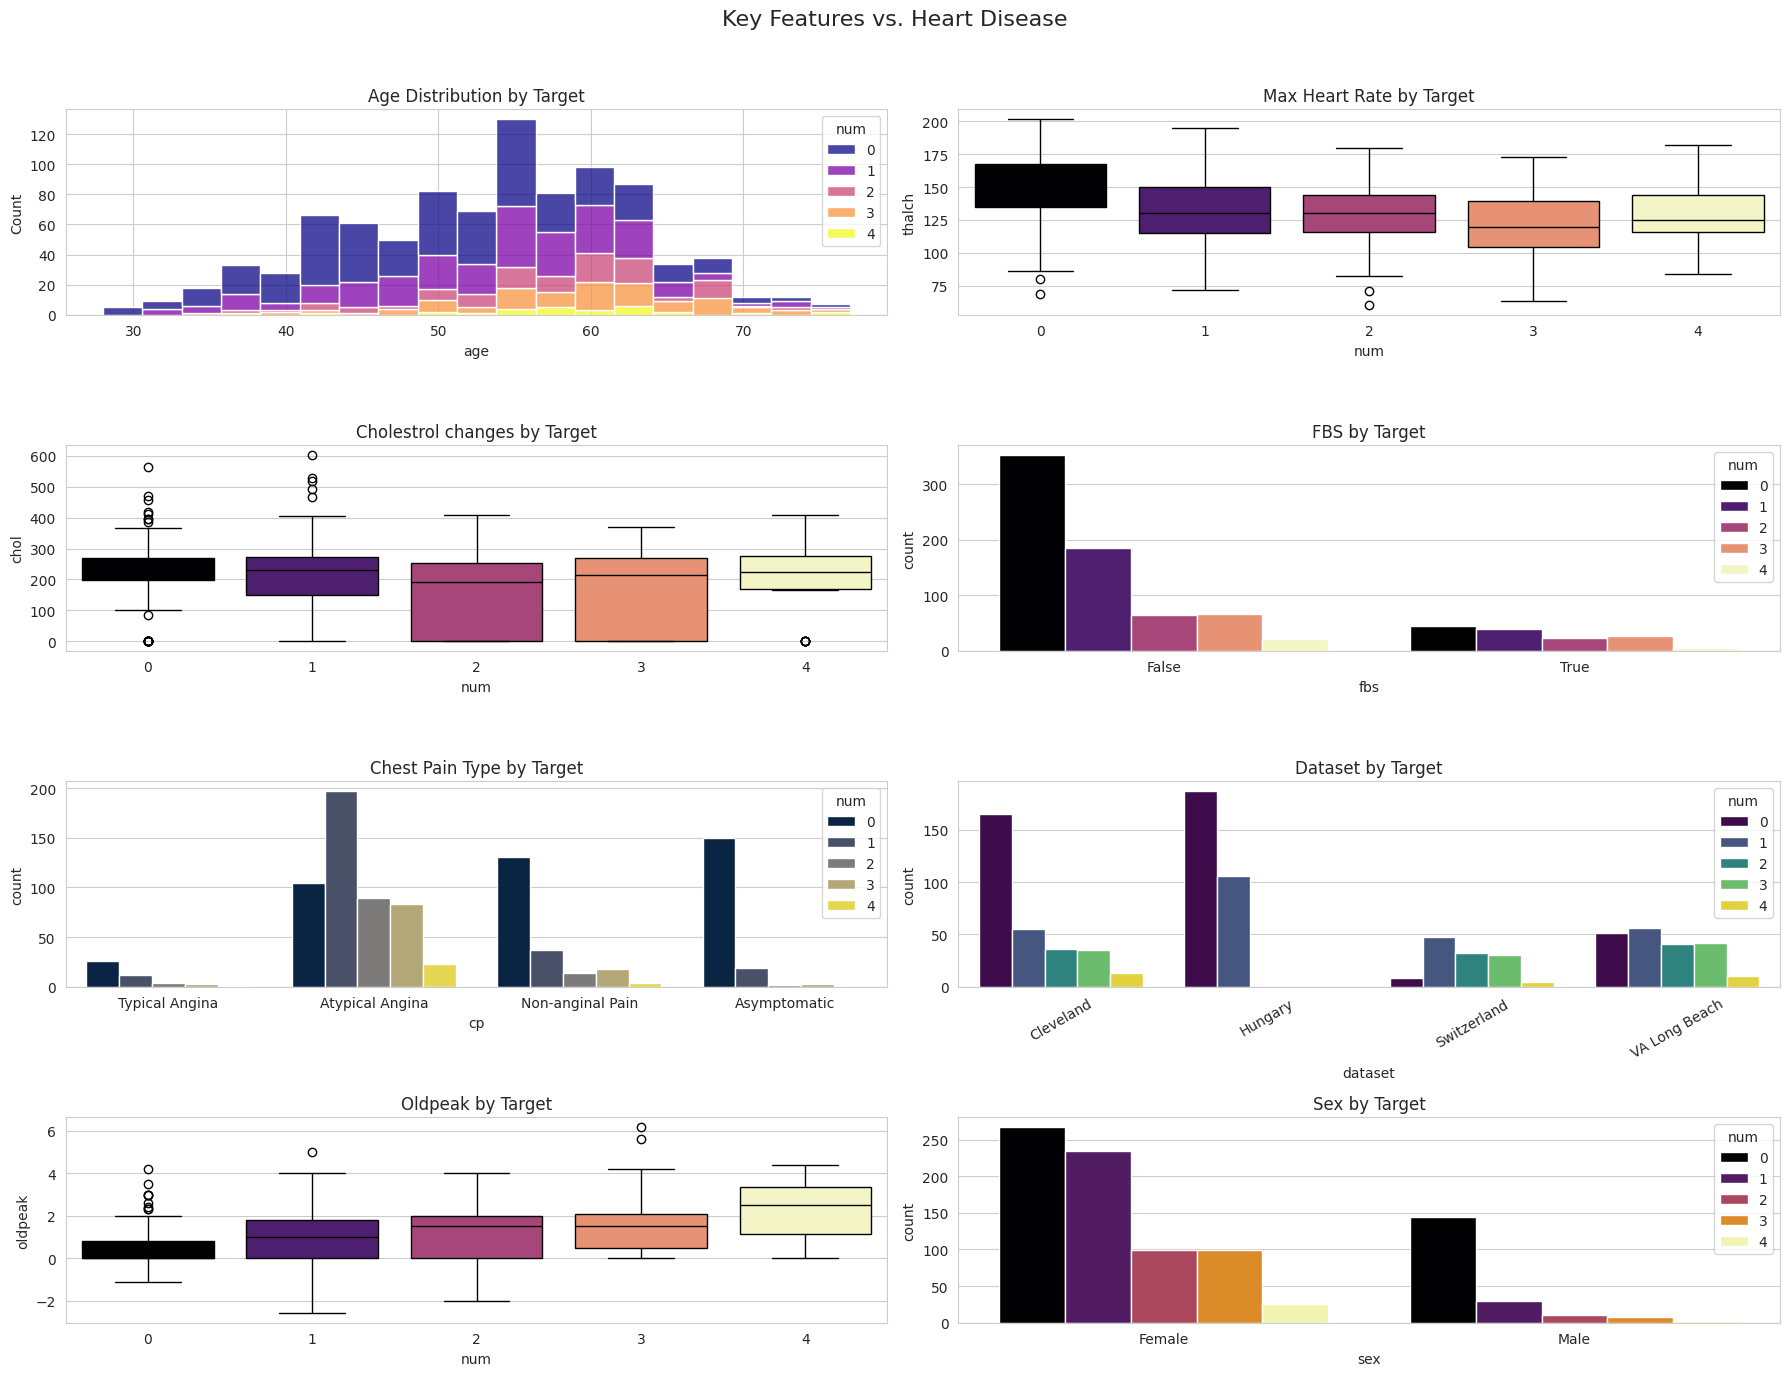

In [11]:
#
# Let's visualize the relationship between key features and the target
fig, axes = plt.subplots(4, 2, figsize=(18, 14)) # Changed to 3 rows, 2 columns
fig.suptitle('Key Features vs. Heart Disease', fontsize=16)

# Age vs. Target
sns.histplot(ax=axes[0, 0], data=df, x='age', hue='num', multiple='stack', palette='plasma').set_title('Age Distribution by Target')

# Max Heart Rate vs. Target
sns.boxplot(ax=axes[0, 1], data=df, x='num', y='thalch', palette='magma', hue='num', legend=False).set_title('Max Heart Rate by Target')

#Cholestrol vs Target
sns.boxplot(ax=axes[1,0],data=df,x='num',y='chol',palette='magma',hue='num',legend=False).set_title('Cholestrol changes by Target')

#fps vs Target
sns.countplot(ax=axes[1,1],data=df,x='fbs',hue='num',palette='magma').set_title('FBS by Target')

# Chest Pain Type vs. Target
cp_plot = sns.countplot(ax=axes[2, 0], data=df, x='cp', hue='num', palette='cividis')
cp_plot.set_title('Chest Pain Type by Target')
cp_plot.set_xticks(range(len(df['cp'].unique())))
cp_plot.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

# Dataset vs. Target - Added this plot to fill the 3x2 grid
dataset_plot = sns.countplot(ax=axes[2, 1], data=df, x='dataset', hue='num', palette='viridis')
dataset_plot.set_title('Dataset by Target')
dataset_plot.tick_params(axis='x', rotation=30) # Rotate labels for better readability


#oldpeak vs Target
oldpeak_plot = sns.boxplot(ax=axes[3, 0], data=df, x='num', y='oldpeak', palette='magma', hue='num', legend=False)
oldpeak_plot.set_title('Oldpeak by Target')

# Sex vs. Target
sex_plot = sns.countplot(ax=axes[3, 1], data=df, x='sex', hue='num', palette='inferno')
sex_plot.set_title('Sex by Target')
sex_plot.set_xticks(range(len(df['sex'].unique())))
sex_plot.set_xticklabels(['Female', 'Male'])


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

This shows the categorical column count wrt target column:

num-0 stands for no disease and num 1-4 shows some sort of heart disease level.

Around the age of 30 most people are starting to shows the early sign of heart disease.

There is also reduction in people max heartrate range  if person is suffering or  have early sign of heart disease.


/tmp/ipython-input-1355160695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df,x='num',palette='magma')


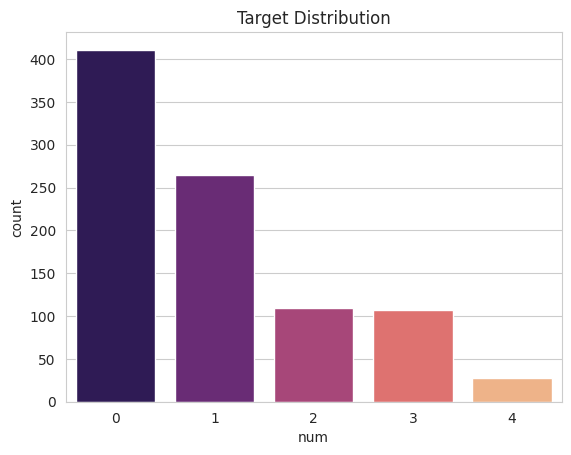

In [12]:
#analyse the target column
ax=sns.countplot(data=df,x='num',palette='magma')
ax.set_title('Target Distribution')
plt.show()

<Axes: >

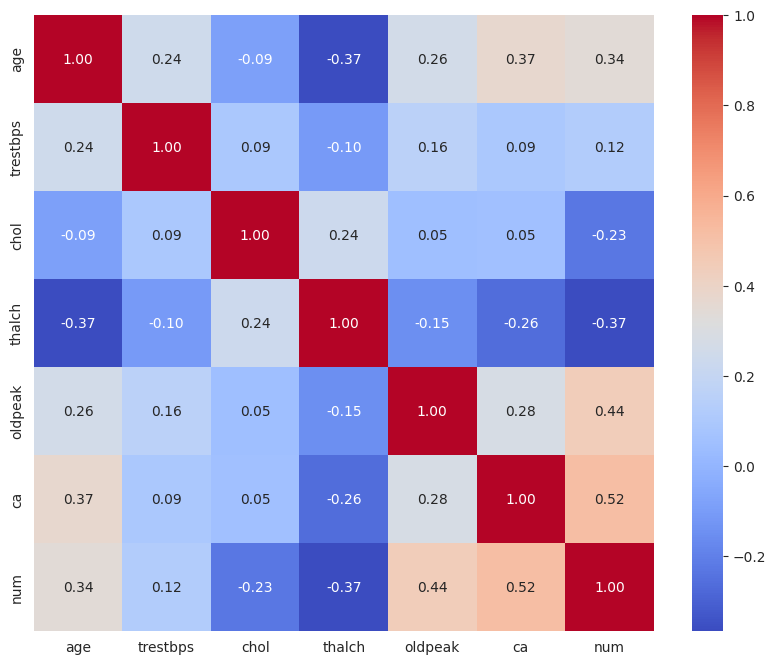

In [13]:
#correlation between numerical column
plt.figure(figsize=(10,8))
df_num=df.select_dtypes(exclude='object')
sns.heatmap(df_num.corr(),annot=True,cmap='coolwarm',fmt='.2f')

In [14]:
df.isnull().sum()

,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55
exang,55


In [15]:
#first remove the columns which don't have any significance here

df.drop('dataset',axis=1,inplace=True)


In [16]:
X=df.drop('num',axis=1)
y=df['num']



In [17]:
#start dealing with the missing value
X.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55
exang,55
oldpeak,62


In [18]:
#start dealing with the missing value
#in numerical column, mean of column will be treated as parameter to fill the missing value
for i in num_columns:
    if i in X.columns: # Check if the column exists in X
      X[i] = X[i].fillna(X[i].mean())




#in categorical column, frequent value should be used as parameter to  filled with the missing value
for i in cat_columns: # Iterate through original categorical columns
    if i in X.columns: # Check if the column exists in X
        X[i] = X[i].fillna(X[i].mode()[0])


cat_column1=X.select_dtypes(include='object').columns
num_column1=X.select_dtypes(exclude='object').columns

#convert the columns in to onehot encoding
X = pd.get_dummies(X, columns=cat_column1, drop_first=True)


#convert num column into binary classification
y=y.apply(lambda y:1 if y>0 else 0)


/tmp/ipython-input-2048570200.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[i] = X[i].fillna(X[i].mode()[0])


In [19]:
X.head()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145.0,233.0,True,150.0,False,2.3,0.0,True,False,False,True,False,False,False,False,False,False
1,67,160.0,286.0,False,108.0,True,1.5,3.0,True,False,False,False,False,False,True,False,True,False
2,67,120.0,229.0,False,129.0,True,2.6,2.0,True,False,False,False,False,False,True,False,False,True
3,37,130.0,250.0,False,187.0,False,3.5,0.0,True,False,True,False,True,False,False,False,True,False
4,41,130.0,204.0,False,172.0,False,1.4,0.0,False,True,False,False,False,False,False,True,True,False


In [20]:
#checking the missing value presence
X.isnull().sum()

,0
age,0
trestbps,0
chol,0
fbs,0
thalch,0
exang,0
oldpeak,0
ca,0
sex_Male,0
cp_atypical angina,0


In [21]:
#model training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

scaler=StandardScaler()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



In [22]:
lr_model=RandomForestClassifier(n_estimators=200, random_state=42)
lr_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [23]:
y_pred=lr_model.predict(X_test)
y_prob = lr_model.predict_proba(X_test)

In [24]:
print("--- Model Performance ---")
print(classification_report(y_test, y_pred, zero_division=0))

--- Model Performance ---
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        75
           1       0.90      0.85      0.88       109

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))
print("ROC-AUC:", roc_auc_score(y_test, y_prob[:, 1])) # Pass probabilities of the positive class
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.8586956521739131
Precision: 0.8619709832246767
Recall: 0.8586956521739131
F1 Score: 0.8594134536505331
ROC-AUC: 0.9180428134556575

Confusion Matrix:
 [[65 10]
 [16 93]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        75
           1       0.90      0.85      0.88       109

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

